In [ ]:
# Move ipynb to the root of the repo to run it correctly
# Moved here for sving purpose

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

from preprocess.file_manage import load_csv
from setting.paths import TRAIN_DIR, TEST_DIR

2024-11-07 22:47:06.383802: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-07 22:47:06.385627: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-07 22:47:06.390945: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731037626.400072 2264232 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731037626.402752 2264232 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-07 22:47:06.412566: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
def create_dataset(X, y, n_input=3):
    '''
    Create a dataset suitable for LSTM.

    Parameters:
        X (DataFrame): The input DataFrame.
        y (DataFrame): The target DataFrame.
        n_input (int): The number of time steps to look back.

    Returns:
        TimeseriesGenerator: A generator for training the model.
    '''
    generator = TimeseriesGenerator(
        X.values, y.values, length=n_input, batch_size=1)
    return generator

In [3]:
def build_lstm_model(input_shape):
    '''
    Build and compile the LSTM model.

    Parameters:
        input_shape (tuple): Shape of the input data.

    Returns:
        model: Compiled LSTM model.
    '''
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

In [4]:
def plot_loss(history):
    '''
    Plot training and validation loss over epochs.
    '''
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title('Training Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_predictions(y_true, y_pred):
    '''
    Plot predicted vs actual values.
    '''
    plt.figure(figsize=(10, 6))
    plt.plot(y_true, label='Actual Traffic Flow')
    plt.plot(y_pred, label='Predicted Traffic Flow')
    plt.title('Predicted vs Actual Traffic Flow')
    plt.xlabel('Time')
    plt.ylabel('Traffic Flow')
    plt.legend()
    plt.show()

In [ ]:
def main(hide = False):
    '''
    main running codes
    '''
    X_train = load_csv(f"{TRAIN_DIR}/X.csv")
    y_train = load_csv(f"{TRAIN_DIR}/y.csv")
    X_test = load_csv(f"{TEST_DIR}/X.csv")
    y_test = load_csv(f"{TEST_DIR}/y.csv")

    n_input = 3
    train_gen = create_dataset(X_train, y_train, n_input=n_input)
    test_gen = create_dataset(X_test, y_test, n_input=n_input)

    model = build_lstm_model(input_shape=(n_input, X_train.shape[1]))

    checkpoint = ModelCheckpoint('LSTM_best_model.keras', save_best_only=True, monitor='loss', mode='min')

    verbose = 2 if hide else 0 if hide == 'Full' else 1

    history = model.fit(train_gen, epochs=200, verbose=verbose, callbacks=[checkpoint])

    plot_loss(history)

    loss = model.evaluate(test_gen)
    print(f'Test Loss: {loss}')

    y_pred = model.predict(test_gen)
    plot_predictions(y_test.values, y_pred)

Epoch 1/200


W0000 00:00:1731037627.697626 2264232 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/jun/miniconda3/envs/traffic/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/jun/miniconda3/envs/traffic/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments t

2377/2377 - 3s - 1ms/step - loss: 4518.9941
Epoch 2/200
2377/2377 - 2s - 844us/step - loss: 3866.7568
Epoch 3/200
2377/2377 - 2s - 787us/step - loss: 3824.0378
Epoch 4/200
2377/2377 - 2s - 827us/step - loss: 3808.3745
Epoch 5/200
2377/2377 - 2s - 837us/step - loss: 3785.8354
Epoch 6/200
2377/2377 - 2s - 821us/step - loss: 3766.5342
Epoch 7/200
2377/2377 - 2s - 815us/step - loss: 3758.9128
Epoch 8/200
2377/2377 - 2s - 815us/step - loss: 3723.2769
Epoch 9/200
2377/2377 - 2s - 780us/step - loss: 3733.4583
Epoch 10/200
2377/2377 - 2s - 769us/step - loss: 3731.6970
Epoch 11/200
2377/2377 - 2s - 805us/step - loss: 3719.8245
Epoch 12/200
2377/2377 - 2s - 810us/step - loss: 3743.3474
Epoch 13/200
2377/2377 - 2s - 840us/step - loss: 3743.8174
Epoch 14/200
2377/2377 - 2s - 786us/step - loss: 3726.7993
Epoch 15/200
2377/2377 - 2s - 732us/step - loss: 3730.4346
Epoch 16/200
2377/2377 - 2s - 737us/step - loss: 3712.1814
Epoch 17/200
2377/2377 - 2s - 705us/step - loss: 3723.9592
Epoch 18/200
2377/23

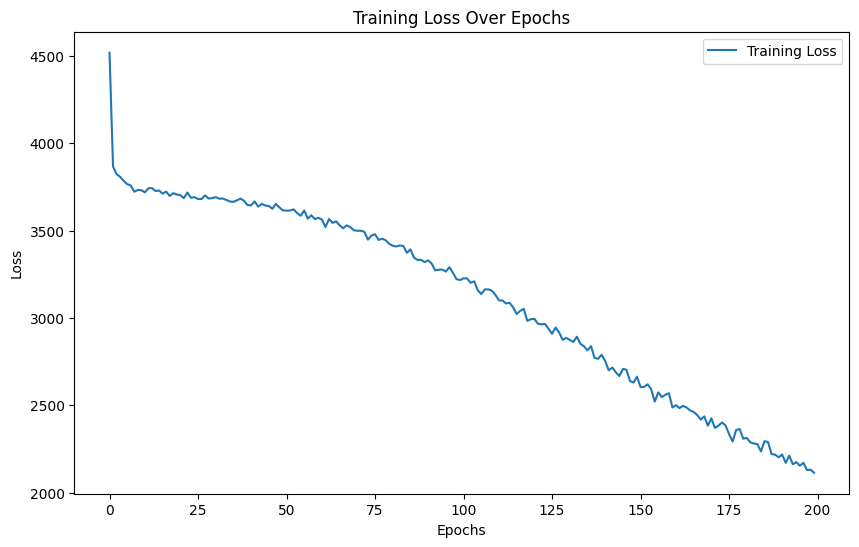

593/593 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 5086.8389
Test Loss: 5247.09619140625
593/593 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step


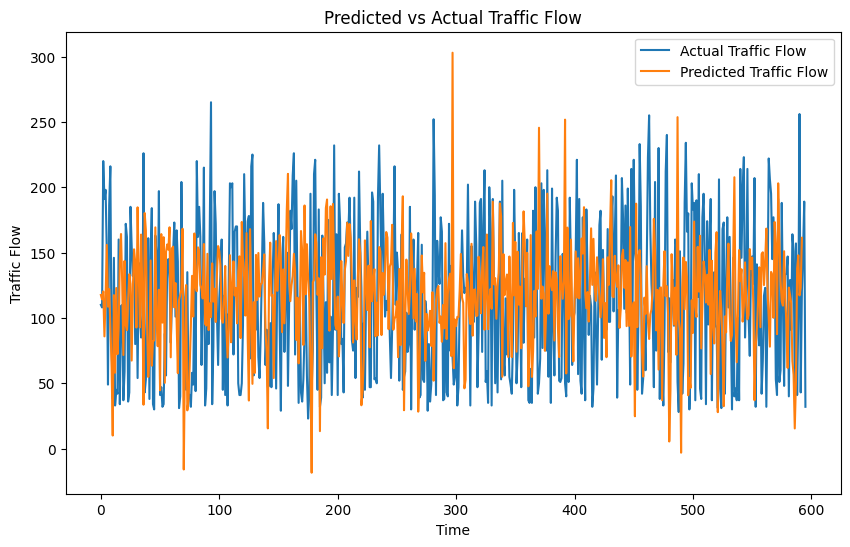

In [6]:
main(hide=True)